In [22]:
import pandas as pd

In [23]:
df=pd.read_csv("/Users/jerry/Desktop/6110/6110 as1/sales_data.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Product     947 non-null    object 
 1   Region      942 non-null    object 
 2   Price       945 non-null    float64
 3   Units Sold  943 non-null    float64
 4   Sale Date   1050 non-null   object 
dtypes: float64(2), object(3)
memory usage: 41.1+ KB


Here is shown that there exists null values in the dataframe. Drop all null values first.

In [24]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 684 entries, 1 to 1048
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Product     684 non-null    object 
 1   Region      684 non-null    object 
 2   Price       684 non-null    float64
 3   Units Sold  684 non-null    float64
 4   Sale Date   684 non-null    object 
dtypes: float64(2), object(3)
memory usage: 32.1+ KB


Drop duplicated values.

In [25]:
df.drop_duplicates(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 653 entries, 1 to 998
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Product     653 non-null    object 
 1   Region      653 non-null    object 
 2   Price       653 non-null    float64
 3   Units Sold  653 non-null    float64
 4   Sale Date   653 non-null    object 
dtypes: float64(2), object(3)
memory usage: 30.6+ KB


In [26]:
#"Units Sold" is not callable in functions, change a name for it.
df.rename(columns={'Units Sold':'Units_Sold'},inplace=True)
df['Total Sales'] = df['Price'] * df['Units_Sold']

In [27]:
df

,Product,Region,Price,Units_Sold,Sale Date,Total Sales
1,Product_40,Region_2,46.19,10.0,2022-01-02,461.90
3,Product_6,Region_8,143.47,8.0,2022-01-04,1147.76
4,Product_44,Region_4,122.54,10.0,2022-01-05,1225.40
5,Product_21,Region_8,15.76,20.0,2022-01-06,315.20
6,Product_31,Region_10,1.60,11.0,2022-01-07,17.60
...,...,...,...,...,...,...
994,Product_19,Region_8,83.76,6.0,2024-09-21,502.56
995,Product_41,Region_5,13.16,7.0,2024-09-22,92.12
996,Product_34,Region_8,70.22,15.0,2024-09-23,1053.30
997,Product_3,Region_9,42.79,7.0,2024-09-24,299.53


In [28]:
# Remove "Product_" and "Region_" from the column values
df['Product']=(df['Product'].str.replace('Product_', ''))
df['Region']=(df['Region'].str.replace('Region_', ''))
df

,Product,Region,Price,Units_Sold,Sale Date,Total Sales
1,40,2,46.19,10.0,2022-01-02,461.90
3,6,8,143.47,8.0,2022-01-04,1147.76
4,44,4,122.54,10.0,2022-01-05,1225.40
5,21,8,15.76,20.0,2022-01-06,315.20
6,31,10,1.60,11.0,2022-01-07,17.60
...,...,...,...,...,...,...
994,19,8,83.76,6.0,2024-09-21,502.56
995,41,5,13.16,7.0,2024-09-22,92.12
996,34,8,70.22,15.0,2024-09-23,1053.30
997,3,9,42.79,7.0,2024-09-24,299.53


In [29]:
#Change product and region data type to integer
df['Product'] = df['Product'].astype(int)
df['Region'] = df['Region'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 653 entries, 1 to 998
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Product      653 non-null    int64  
 1   Region       653 non-null    int64  
 2   Price        653 non-null    float64
 3   Units_Sold   653 non-null    float64
 4   Sale Date    653 non-null    object 
 5   Total Sales  653 non-null    float64
dtypes: float64(3), int64(2), object(1)
memory usage: 35.7+ KB


In [30]:
df

,Product,Region,Price,Units_Sold,Sale Date,Total Sales
1,40,2,46.19,10.0,2022-01-02,461.90
3,6,8,143.47,8.0,2022-01-04,1147.76
4,44,4,122.54,10.0,2022-01-05,1225.40
5,21,8,15.76,20.0,2022-01-06,315.20
6,31,10,1.60,11.0,2022-01-07,17.60
...,...,...,...,...,...,...
994,19,8,83.76,6.0,2024-09-21,502.56
995,41,5,13.16,7.0,2024-09-22,92.12
996,34,8,70.22,15.0,2024-09-23,1053.30
997,3,9,42.79,7.0,2024-09-24,299.53


Find outliers

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: xlabel='Product', ylabel='Total Sales'>

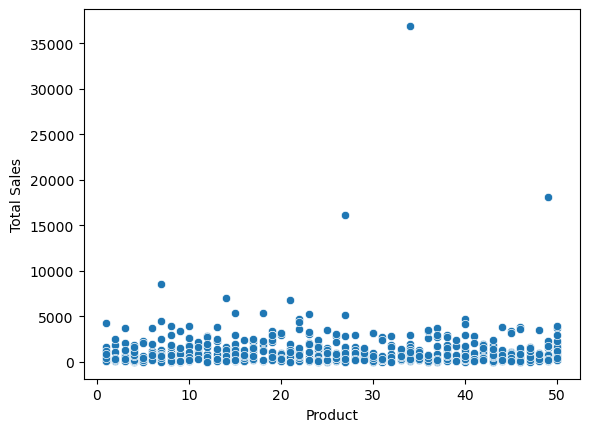

In [32]:
sns.scatterplot(data = df, x = 'Product', y = 'Total Sales')

In [33]:
df[df['Total Sales']>15000]

,Product,Region,Price,Units_Sold,Sale Date,Total Sales
269,49,8,1296.0,14.0,2022-09-27,18144.0
407,27,7,1793.9,9.0,2023-02-12,16145.1
421,34,2,2636.9,14.0,2023-02-26,36916.6


Drop the outliers

In [34]:
df.drop(df[df['Total Sales']>15000].index, axis=0, inplace=True)

<Axes: xlabel='Product', ylabel='Total Sales'>

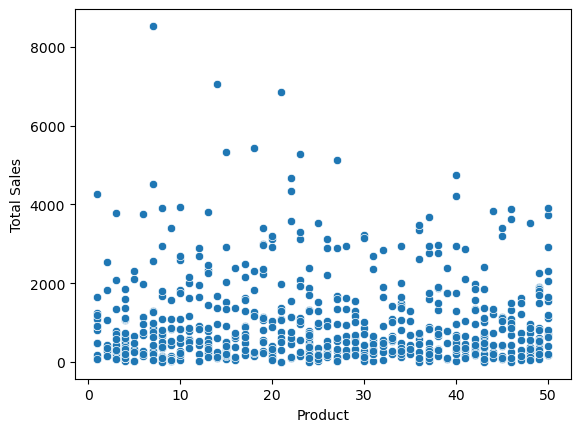

In [35]:
sns.scatterplot(data = df, x = 'Product', y = 'Total Sales')

Let's analyse product performance first.

Firstly, find the total sales for each product

In [36]:
product_sum=df.groupby('Product')['Total Sales'].sum()
product_sum.sort_values(ascending=False)

Product
50    25149.37
7     23290.75
23    22203.34
40    21451.46
19    20210.79
22    18989.90
49    17934.37
10    17379.50
15    17168.71
37    16746.60
27    16498.77
13    16349.31
8     16073.70
24    16065.48
21    15864.49
46    15698.59
38    15647.71
17    14806.21
4     14352.71
34    14188.35
43    13576.30
1     13353.49
36    13104.13
45    12973.49
18    12630.18
20    12593.34
26    12499.84
14    12337.86
12    12158.03
42    11818.37
3     11346.56
6     11282.32
11    10614.82
30    10508.08
28     9971.16
25     9175.79
9      9175.25
32     9068.62
2      8416.42
48     8269.41
29     8233.59
41     8169.72
39     8117.92
33     8115.03
44     8110.28
31     7959.78
16     6585.22
5      6193.29
47     6176.23
35     5047.08
Name: Total Sales, dtype: float64

The total units sold for each product

In [37]:
units_sum=df.groupby('Product')['Units_Sold'].sum()
units_sum.sort_values(ascending=False)

Product
24    242.0
4     206.0
40    197.0
8     186.0
15    185.0
43    179.0
49    174.0
7     169.0
37    167.0
13    154.0
10    154.0
23    152.0
50    151.0
27    148.0
3     148.0
42    148.0
19    142.0
1     142.0
2     137.0
26    135.0
21    135.0
38    135.0
34    134.0
17    133.0
9     131.0
46    128.0
48    125.0
45    125.0
22    122.0
12    122.0
29    121.0
28    120.0
36    120.0
30    115.0
11    114.0
33    111.0
41    109.0
16    109.0
20    107.0
32    103.0
6     103.0
25    101.0
18    100.0
31     99.0
35     99.0
14     98.0
44     80.0
47     80.0
5      80.0
39     69.0
Name: Units_Sold, dtype: float64

The average unit price for each unit

In [38]:
prices_mean=df.groupby('Product')['Price'].mean()
prices_mean.sort_values(ascending=False)

Product
50    185.396471
22    147.406667
19    134.382857
46    130.662308
23    130.019286
21    126.741667
18    121.273750
39    121.121250
17    120.060000
7     118.983750
20    113.782500
40    110.760000
11    109.194000
38    109.129231
27    109.052941
34    107.032308
49    106.437778
10    106.107143
14    105.698889
37    105.664706
6     105.290909
13    103.817143
45    102.375833
8     100.477647
36     98.694615
15     93.892353
26     93.280769
12     90.075455
44     88.755000
25     88.566364
33     88.181667
30     88.080833
1      86.229231
28     85.295455
42     83.470000
43     83.074211
32     82.523333
31     80.759091
4      78.524091
16     75.833636
29     75.194545
5      73.421250
47     70.930000
3      70.050667
9      66.940769
41     66.739000
24     62.638182
48     59.778333
2      59.749231
35     49.167778
Name: Price, dtype: float64

Total sales for each region

In [39]:
region_sales=df.groupby('Region')['Total Sales'].sum()
region_sales.sort_values(ascending=False)


Region
5     84648.30
6     72892.36
10    72426.90
2     68097.43
8     65614.45
9     65366.13
1     63016.40
4     56343.54
3     53133.80
7     52112.40
Name: Total Sales, dtype: float64

Total untis sold for each region

In [40]:
region_units=df.groupby('Region')['Units_Sold'].sum()
region_units.sort_values(ascending=False)

Region
5     818.0
2     701.0
9     700.0
7     690.0
8     679.0
10    640.0
1     623.0
6     610.0
4     607.0
3     576.0
Name: Units_Sold, dtype: float64

Each product in which region sales most

In [41]:
product_region_sales = df.groupby(['Product', 'Region']).agg({'Total Sales': 'sum'})
max_sales_regions = product_region_sales.groupby('Product')['Total Sales'].idxmax()
product_region_sales.loc[max_sales_regions].sort_values('Total Sales',ascending=False)

,,Total Sales
Product,Region,
7,10,9215.83
20,6,7548.89
14,1,7420.20
15,6,6856.98
21,4,6851.60
27,5,6810.03
18,6,6595.01
40,3,6057.96
25,5,5725.97


Each region sales which product most

In [42]:
region_product_sales = df.groupby(['Region', 'Product']).agg({'Total Sales': 'sum'})
max_sales_product = region_product_sales.groupby('Region')['Total Sales'].idxmax()
region_product_sales.loc[max_sales_product].sort_values('Total Sales',ascending=False)

,,Total Sales
Region,Product,
10,7,9215.83
6,20,7548.89
1,14,7420.20
4,21,6851.60
5,27,6810.03
3,40,6057.96
9,38,5274.17
8,23,5227.36
2,22,4907.82


Until now, I have finished all data cleaning and found all data I decided to use for analysis.

For the data cleaning process,

    -Since there exist null values based on the info() function, I handle missing values by dropping rows with missing values.
    -Remove any duplicate rows to ensure data integrity.
    -Ensure data types are appropriate for each column: 'Units Sold' is not callable, which cannot be used in math calculation; the original data type for product and region are objects, I changed them into integers for better sorting.
    -To find and drop the outliers, I used scatterplot for a better vision.

To conduct the exploratory analysis and provide insights and recommendations for the sales strategy, I spilt the analysis into Product Analysis and Regional Analysis. Overall I also conduct the cross analysis to compare the sales relationship between product and regions.

For the product analysis,

    -Analyze the sales performance of various products by examining their total sales, units sold, and price.
    -Identify the best-selling products based on total sales and units sold.
    -Evaluate the profitability of each product by considering the revenue generated (total sales * price) and comparing it with the product's cost.
    
For the regional analysis,

    -Analyze the sales performance across different regions by examining the total sales and units sold in each region.
    -Identify the regions with the highest and lowest sales.

For the cross-analysis,

    -Identify the best-selling products in each region and analyze regional preferences.
    -Explore the relationship between price and units sold to understand the price sensitivity and elasticity of demand for different products.


Sales Performance of Products:

    -The top-selling products based on total sales are Product 50, Product 7, and Product 23.
    -Product 50 has consistently high sales performance, indicating strong demand for that particular product.

Sales Performance by Regions:

    -Region 5, Region 6, and Region 10 are the top-performing regions based on total sales.
    -Regions 2 and 9 also show relatively strong sales performance.
    -Region 1, Region 4, and Region 7 have moderate sales performance.
    -Regions 3 and 8 have relatively lower sales compared to other regions.

Cross-Analysis of Products and Regions:

    -The top-selling product in Region 10 is Product 7, indicating a strong demand for this product in that region.
    -Region 6 shows high sales for Product 20, suggesting a specific preference for this product in that region.
    -Product 14 performs well in Region 1, indicating a potential market for this product in that region.
    -Further analysis is required to identify the specific preferences and factors driving sales in each region for the other products.


Recommendations for the business:

1) Focus on Top-Selling Products:
- Allocate resources and marketing efforts towards promoting and optimizing the sales of top-performing products, such as Product 50, Product 7, and Product 23.

2) Regional Strategy:
- Identify opportunities to expand sales in high-performing regions like Region 5, Region 6, and Region 10.
- Explore potential strategies to increase sales in underperforming regions like Region 3 and Region 8.

3) Pricing Strategy:
- Analyze the relationship between price and units sold to identify price sensitivity and elasticity of demand for different products.
- Adjust prices strategically to maximize revenue and profitability while considering market dynamics and competition.

4) Marketing Approach:
- Utilize regional preferences and sales patterns to tailor marketing and promotional strategies for each region.

5) Continuous Monitoring and Analysis:
- Continuously monitor and analyze sales performance, allowing for data-driven decision-making and timely adjustments to the sales strategy.